In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def line(i1,j1,i2,j2):
    
    if abs(i2-i1) == abs(j2-j1):
        if i1 > i2:
            i1,j1,i2,j2 = i2,j2,i1,j1
        i = np.arange(i1+1,i2+1)
        if j1 > j2:
            j = (j2-j1)/(i2-i1)*(i-i1)+j1+1
        else:
            j = (j2-j1)/(i2-i1)*(i-i1)+j1
                   
    elif abs(i2-i1) >= abs(j2-j1):
        if i1 > i2:
            i1,j1,i2,j2 = i2,j2,i1,j1
        i = np.arange(i1+1,i2+1)
        j = (j2-j1)/(i2-i1)*(i-i1)+j1
    else:
        if j1 > j2:
            i1,j1,i2,j2 = i2,j2,i1,j1
        j = np.arange(j1+1,j2+1)
        i = (i2-i1)/(j2-j1)*(j-j1)+i1
    
    return np.ceil(i).astype(int),np.ceil(j).astype(int)


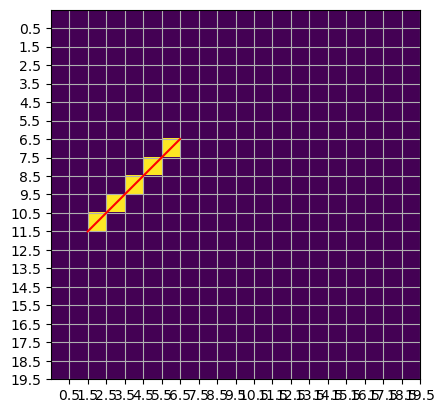

In [3]:
A = np.zeros((20,20))
i1,j1,i2,j2 = 6,6,11,1
#i1,j1,i2,j2 = 11,11,6,6
i,j = line(i1,j1,i2,j2)
#A[[i1,i2],[j1,j2]]+=2
A[i,j] += 1
plt.imshow(A)
plt.xticks(np.arange(20)+0.5)
plt.yticks(np.arange(20)+0.5)
plt.grid()
plt.plot([j1+0.5,j2+0.5],[i1+0.5,i2+0.5],'r')
plt.show()

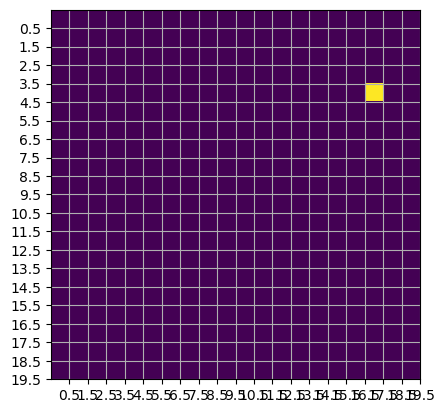

[[ 4]
 [17]]


In [266]:
i,j = 4,17
size = 5
B = np.zeros((20,20))
r = int((size-1)/2)
B[i,j] =1
#B[i-1,j-1] =1
#B[i+1,j+1]=1
plt.imshow(B)
plt.xticks(np.arange(20)+0.5)
plt.yticks(np.arange(20)+0.5)
plt.grid()
plt.show()
K = box_search(B,i,j,size)
print(K)


In [ ]:
def box_search(A,i,j,box_size):
     r = int((box_size-1)/2)

     edges = np.nonzero([i-r < 0, j-r < 0, i+r >= A.shape[0], j+r >= A.shape[1]])[0]
     if edges.size:
          return edges[0]
     
     else:
          inds = np.array(np.nonzero(A[i-r:i+r+1,j-r:j+r+1])) #Indbygget np funktion, kan måske gøres hurtigere
          inds += np.array([[i-r],[j-r]])
          return inds

In [7]:
def branch_cut(residue,max_box_size=None):
    
    branch_cuts = np.zeros(residue.shape)#.astype(bool)
    balanced = np.zeros(residue.shape).astype(bool)
    found_res = []

    if max_box_size is None:
        max_box_size = np.min(residue.shape)

    for i in range(residue.shape[0]):
        for j in range(residue.shape[1]):

            if residue[i,j] and not balanced[i,j]:

                found_res.append((i,j))

                active = np.zeros(residue.shape).astype(bool)
                active_list = []
                active[i,j] = True
                active_list.append((i,j))
                charge = residue[i,j]

                for box_size in range(3,max_box_size+2,2):

                    N = 0
                    while N < len(active_list):

                        m,n = active_list[N] # Current active pixel
                        res_inds = box_search(residue.astype(bool) & np.logical_not(active),m,n,box_size)

                        if type(res_inds) == np.ndarray:

                            for k in range(res_inds.shape[1]):

                                p = tuple(res_inds[:,k])

                                if not balanced[p]:
                                    charge += residue[p]
                                    balanced[p] = True

                                # Mark residue as active
                                active[p] = True
                                active_list.append(p)

                                # Place branch cut
                                i_bc,j_bc = line(m,n,p[0],p[1])
                                branch_cuts[i_bc,j_bc] += 1 #True
                                found_res.append(p)

                                if not charge:
                                    break
                        else:
                            if res_inds == 0:
                                branch_cuts[0:m+1,n] = True #Top edge
                            elif res_inds == 1:
                                branch_cuts[m,0:n+1] = True #Left edge
                            elif res_inds == 2:
                                branch_cuts[m+1:,n] = True #Bottom edge
                            elif res_inds == 3:
                                branch_cuts[m,n+1:] = True #Right edge
                            charge = 0
                        
                        N += 1
                        if not charge:
                            break

                    if not charge:
                        break

                balanced[i,j] = True

                # TODO If charge still nonzero place branch cut to border
    return branch_cuts, found_res  



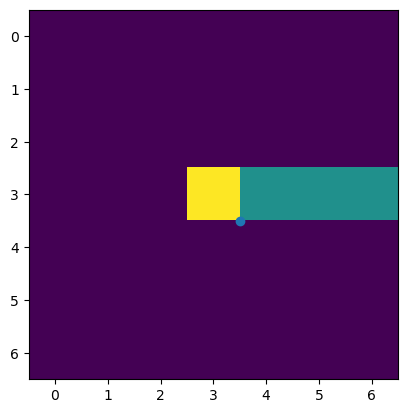

In [497]:
H = np.zeros((7,7))
i,j=3,3
H[i,j] = 2
#H[0:i+1,j] = 1
#H[i,0:j+1] = 1
#H[i+1:,j] = 1
#H[i,j+1:] = 1
plt.imshow(H)
plt.scatter(i+0.5,j+0.5)
plt.show()

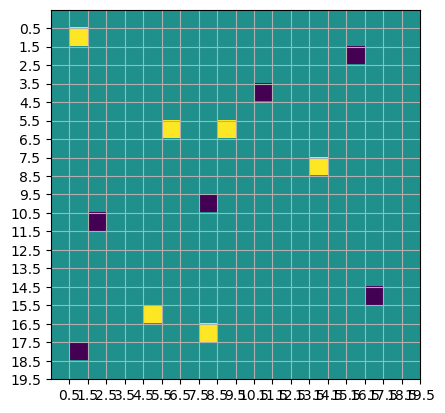

In [8]:
C = np.zeros((20,20))
C[6,6] = 1
C[10,8] = -1
C[4,11] = -1
C[6,9] =1
C[1,1] = 1
C[8,14] = 1
C[2,16] = -1
C[15,17] = -1
C[11,2] = -1
C[16,5] = 1
C[17,8] = 1
C[18,1] = -1
plt.imshow(C)
plt.xticks(np.arange(20)+0.5)
plt.yticks(np.arange(20)+0.5)
plt.grid()
plt.show()

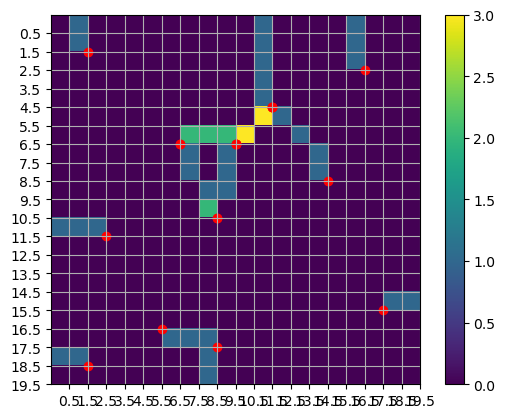

[[ 1  1]
 [ 2 16]
 [ 4 11]
 [ 6  9]
 [ 6  6]
 [ 6  9]
 [ 4 11]
 [10  8]
 [ 8 14]
 [ 4 11]
 [ 6  9]
 [ 6  6]
 [10  8]
 [11  2]
 [15 17]
 [16  5]
 [17  8]
 [18  1]]


In [11]:
branch_cuts,found = branch_cut(C)
found = np.array(found)

plt.imshow(branch_cuts)
plt.xticks(np.arange(20)+0.5)
plt.yticks(np.arange(20)+0.5)
plt.colorbar()
plt.scatter(found[:,1]+0.5,found[:,0]+0.5,c='r')
plt.grid()
plt.show()
print(found)


In [ ]:
''' TODO
        Hold styr på eksisterende branch cuts?
'''

'''
def branch_cut(residue,max_box_size=None):

    branch_cuts = np.zeros(residue.shape).astype(bool)
    #active = np.zeros(residue.shape).astype(bool)
    #inactive = residue.astype(bool)
    balanced = np.zeros(residue.shape).astype(bool)

    if max_box_size is None:
         max_box_size = np.min(residue.size)
    
    for i in range(residue.shape[0]):
        for j in range(residue.shape[1]):

            if inactive[i,j] and not balanced[i,j]:
                inactive[i,j] = False
                charge = residue[i,j]
                box_size = 3
                m,n = i,j # Current search point
                while charge:
                    
                    while box_size <= max_box_size:
                        res_ind = box_search(inactive,m,n,box_size)
                        if res_ind:
                            m_n,n_n = res_ind[0],res_ind[1]
                            break

                        win_size+=2

                    # Place branch cut
                    i_bc,j_bc = line(m,n,m_n,n_n)
                    branch_cuts[i_bc,j_bc] = True

                    # Set found residual to active and update charge
                    inactive[m_n,n_n] = False
                    charge += residue[m_n,n_n]
                    # If edge set charge to 0 
                    m,n = m_n,n_n
                    
                balanced[i,j] = 1

    return branch_cuts
'''                






  

